In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.transforms as transforms


In [2]:
# Note to self: CSV - failing dtype, wont plot or change to int using .astype(int)
df = pd.read_csv("./data/seklima/wyssen_det/130317_260317.csv")

In [3]:
df = df.drop(df.index[-1])
df

,name,station,id,sum(precipitation_amount PT1H),air_temperature,max_wind_speed(wind_from_direction PT1H),max(wind_speed PT1H),time (Norwegian Mean time)
0,Filefjell - Kyrkjestølane,SN54710,0.0,0,"-2,4",97.0,"1,1",13.03.2017 00:00
1,Filefjell - Kyrkjestølane,SN54710,1.0,0,"-1,9",38.0,2,13.03.2017 01:00
2,Filefjell - Kyrkjestølane,SN54710,2.0,0,"-2,1",99.0,"4,1",13.03.2017 02:00
3,Filefjell - Kyrkjestølane,SN54710,3.0,0,"-2,1",116.0,"2,8",13.03.2017 03:00
4,Filefjell - Kyrkjestølane,SN54710,4.0,0,"-1,7",90.0,"3,4",13.03.2017 04:00
...,...,...,...,...,...,...,...,...
307,Filefjell - Kyrkjestølane,SN54710,307.0,0,"1,7",244.0,"7,5",25.03.2017 19:00
308,Filefjell - Kyrkjestølane,SN54710,308.0,"0,3","1,7",246.0,"8,4",25.03.2017 20:00
309,Filefjell - Kyrkjestølane,SN54710,309.0,"0,1","2,1",250.0,"7,4",25.03.2017 21:00
310,Filefjell - Kyrkjestølane,SN54710,310.0,"0,1","2,1",244.0,"8,2",25.03.2017 22:00


In [4]:
df['air_temperature'] = (df['air_temperature'].replace('\.','', regex=True).replace(',','.', regex=True).astype(float))
df['time (Norwegian Mean time)'] = df['time (Norwegian Mean time)'].replace('.','-')

precipitation = df['sum(precipitation_amount PT1H)']

In [5]:
# Format = %d-%m-%Y %H:%M:%S, lenght: 360, dtype: datetime64[ns]
time = df['time (Norwegian Mean time)']
time2 = pd.to_datetime(time, format='%d.%m.%Y %H:%M')

In [6]:
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()       # every day
hour = mdates.HourLocator()       # every hour
myFmt = mdates.DateFormatter('%d.%m.%Y')

In [10]:
# Input to plot

# Satellite passing date-time
x1 = datetime.datetime(2017,3,13,5,55,0)
x2 = datetime.datetime(2017,3,13,17,10,0)
x3 = datetime.datetime(2017,3,14,5,47,0)
x4 = datetime.datetime(2017,3,14,17,3,0)
#x5 = datetime.datetime(2017,3,19,8,0,0)
x6 = datetime.datetime(2017,3,20,5,56,0)
x7 = datetime.datetime(2017,3,20,17,10,0)
x8 = datetime.datetime(2017,3,21,5,47,0)
x9 = datetime.datetime(2017,3,21,17,1,0)
x10 = datetime.datetime(2017,3,14,16,15,0) # 131
x11 = datetime.datetime(2017,3,16,16,0,0) # 160
x12 = datetime.datetime(2017,3,17,5,20,0) # 168
x13 = datetime.datetime(2017,3,18,5,11,0) # 95
x14 = datetime.datetime(2017,3,20,16,15,0) # 131
x15 = datetime.datetime(2017,3,22,16,0,0) # 160
x16 = datetime.datetime(2017,3,23,5,20,0) # 168
x17 = datetime.datetime(2017,3,24,5,11,0) # 95

# Start- and end-date on x-axis
start = datetime.datetime(2017, 3, 13)
end = datetime.datetime(2017, 3, 25)

# Save file as
file = './figures/seklima_eksempel.png'

# Colors
b = 'blue'      # Blue lines: reference and activity image for passing satellite + relative orbit
bc = 'black'    # Black lines: passing satellite + relative orbit
r = 'red'       # Red lines: time of avalanche release
g = 'DodgerBlue'

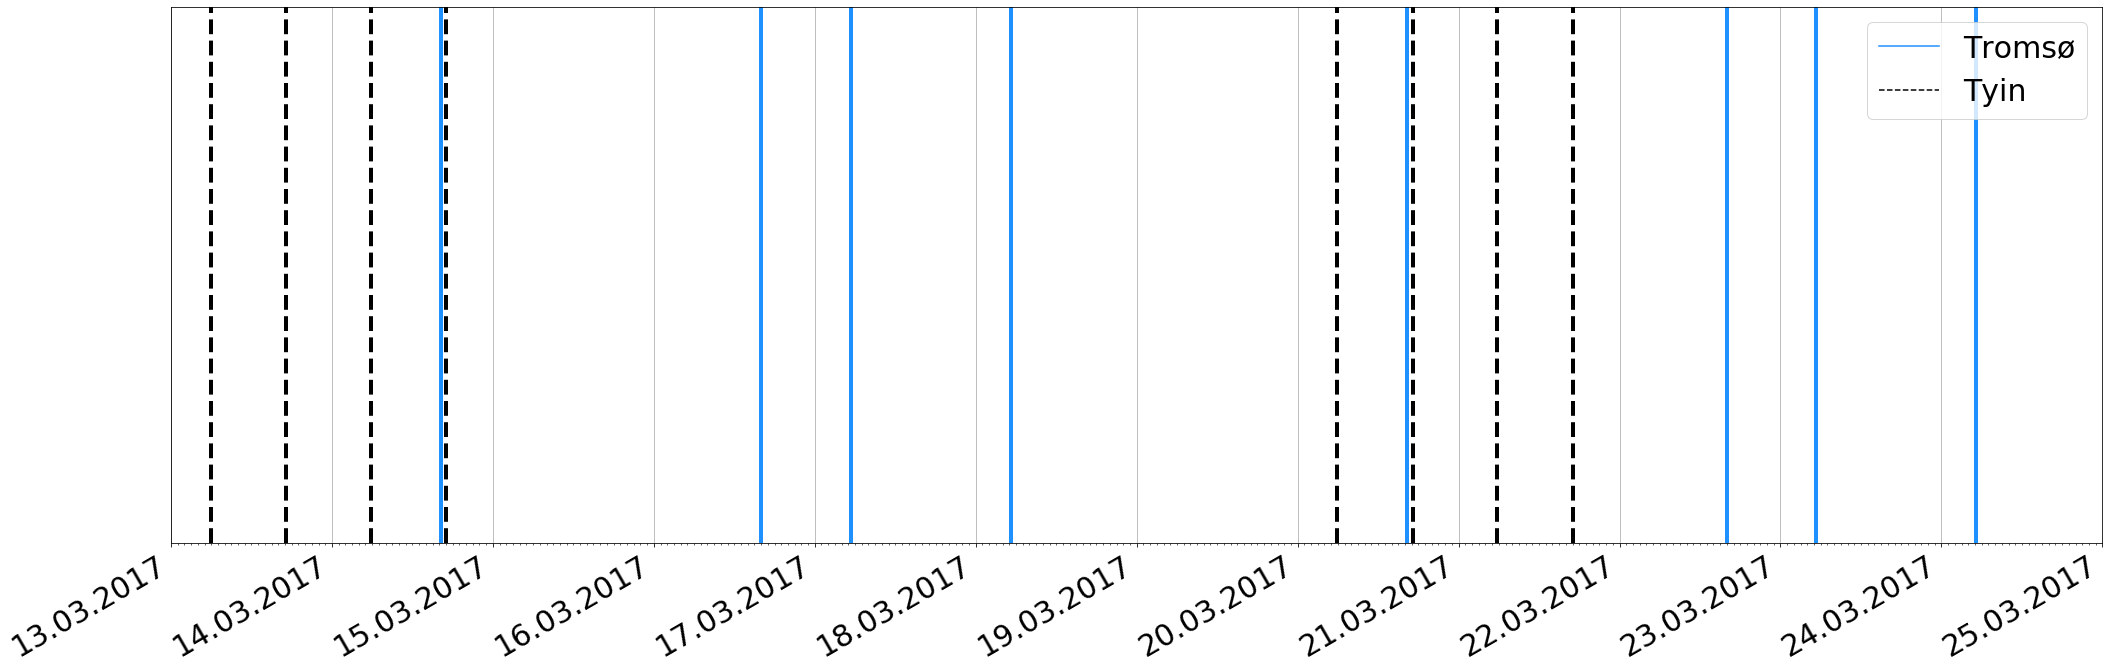

In [12]:
fig, (ax1) = plt.subplots(1, 1, figsize=(30,10))
ax1.bar(time2, 0)

# Formatting X-axis with small lines per day
ax1.xaxis.set_major_locator(days)
ax1.xaxis.set_major_formatter(myFmt)
ax1.xaxis.set_minor_locator(hour)
plt.setp(ax1.get_xticklabels(), rotation=30, ha="right")

# Subplot labels
ax1.grid()
#ax1.set_title('Precipitation per hour [mm]')
#ax1.set_ylabel('[mm]')

# Lines covering all fours plots at the same date-time.
for ax in [ax1]:
    ax.axvline(x=x1, c=bc, linestyle='--',linewidth=4)
    ax.axvline(x=x2, c=bc, linestyle='--',linewidth=4)
    ax.axvline(x=x3, c=bc,linestyle='--',linewidth=4)
    ax.axvline(x=x4, c=bc,linestyle='--',linewidth=4)
    #ax.axvline(x=x5, c=r,linestyle='--',linewidth=4)
    ax.axvline(x=x6, c=bc,linestyle='--',linewidth=4)
    ax.axvline(x=x7, c=bc,linestyle='--',linewidth=4)
    ax.axvline(x=x8, c=bc,linestyle='--',linewidth=4)
    ax.axvline(x=x9, c=bc,linestyle='--',linewidth=4)
    ax.axvline(x=x10, c=g, linestyle='-',linewidth=4)
    ax.axvline(x=x11, c=g, linestyle='-',linewidth=4)
    ax.axvline(x=x12, c=g, linestyle='-',linewidth=4)
    ax.axvline(x=x13, c=g,linestyle='-',linewidth=4)
    ax.axvline(x=x14, c=g,linestyle='-',linewidth=4)
    ax.axvline(x=x15, c=g,linestyle='-',linewidth=4)
    ax.axvline(x=x16, c=g,linestyle='-',linewidth=4)
    ax.axvline(x=x17, c=g,linestyle='-',linewidth=4)
    
    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

# X-axis is date-time.
plt.xlim(start, end)
plt.yticks([]) # Remove labels on y-axis

line, = ax.plot([1], c=g,linestyle='-', label='Tromsø')
line, = ax.plot([2], c=bc,linestyle='--', label='Tyin')
ax.legend(loc='upper right')
plt.tight_layout()
plt.rcParams.update({'font.size': 30})
plt.show()

fig.savefig(file)